In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.drop(['car_ID'],axis=1,inplace=True)

data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [5]:
data.CompanyName.replace('maxda','mazda',inplace=True)
data.CompanyName.replace('porcshce','porsche',inplace=True)
data.CompanyName.replace('toyouta','toyota',inplace=True)
data.CompanyName.replace('vokswagen','volkswagen',inplace=True)
data.CompanyName.replace('vw','volkswagen',inplace=True)
data.CompanyName.replace('Nissan','nissan',inplace=True)

In [6]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
def replace_values(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_values('chevrolet',0)
replace_values('dodge',0)
replace_values('plymouth',0)
replace_values('honda',0)
replace_values('subaru',0)
replace_values('isuzu',0)
replace_values('mitsubishi',1)
replace_values('renault',1)
replace_values('toyota',1)
replace_values('volkswagen',1)
replace_values('nissan',1)
replace_values('mazda',1)
replace_values('saab',2)
replace_values('peugeot',2)
replace_values('alfa-romero',2)
replace_values('mercury',2)
replace_values('audi',2)
replace_values('volvo',2)
replace_values('bmw',3)
replace_values('porsche',3)
replace_values('buick',3)
replace_values('jaguar',3)

data.rename(columns = {'CompanyName':'segment'}, inplace = True)
data.head()

,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [9]:
def replace_values(a,b):
    data.cylindernumber.replace(a,b,inplace=True)

replace_values('four','4')
replace_values('six','6')
replace_values('five','5')
replace_values('three','3')
replace_values('twelve','12')
replace_values('two','2')
replace_values('eight','8')

data.cylindernumber=data.cylindernumber.astype('int')

In [10]:
def replace_values(a,b):
    data.symboling.replace(a,b,inplace=True)

replace_values(3,'Very_Risky')
replace_values(2,'Moderately_Risky')
replace_values(1,'Neutral')
replace_values(0,'Safe')
replace_values(-1,'Moderately_Safe')
replace_values(-2,'Very_Safe')

In [11]:
data['fueltype'] = data['fueltype'].map({'gas': 1, 'diesel': 0})
data['aspiration'] = data['aspiration'].map({'std': 1, 'turbo': 0})
data['doornumber'] = data['doornumber'].map({'two': 1, 'four': 0})
data['enginelocation'] = data['enginelocation'].map({'front': 1, 'rear': 0})

In [12]:
data.head()

,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,Very_Risky,2,1,1,1,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,Very_Risky,2,1,1,1,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,Neutral,2,1,1,1,hatchback,rwd,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,Moderately_Risky,2,1,1,0,sedan,fwd,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,Moderately_Risky,2,1,1,0,sedan,4wd,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


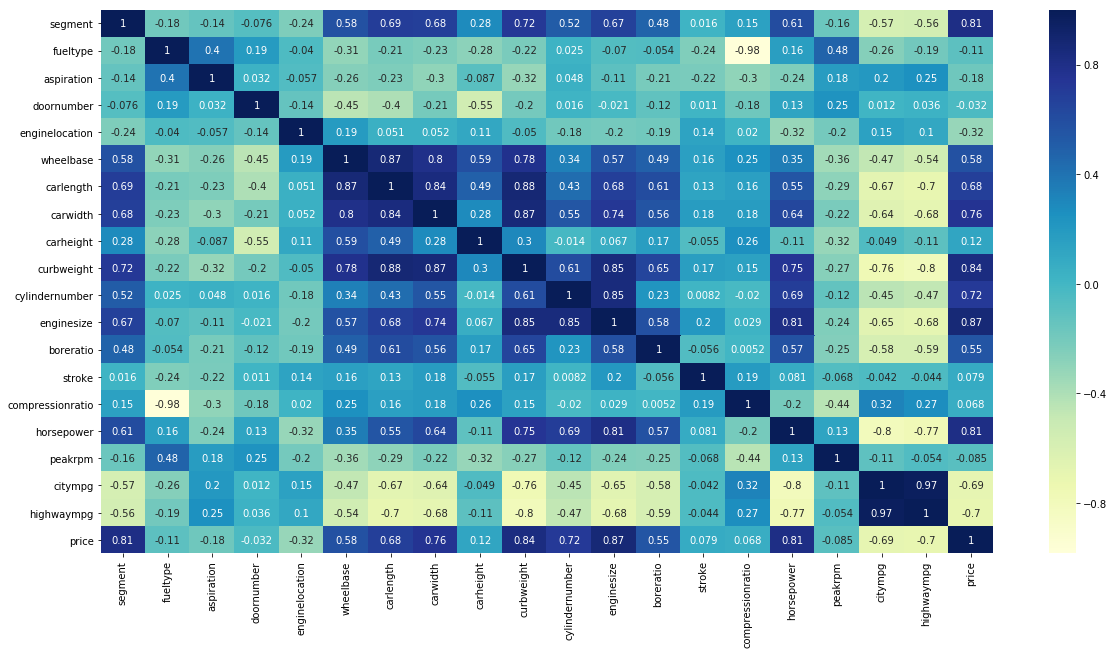

In [13]:
num_vars=data.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize = (20,10))  
sns.heatmap(data[num_vars].corr(),cmap="YlGnBu",annot = True)

In [14]:
data.drop(['compressionratio','carwidth','curbweight','wheelbase','citympg', 'stroke', 'carheight', 'doornumber'], axis =1, inplace = True)

In [15]:
data.head()

,symboling,segment,fueltype,aspiration,carbody,drivewheel,enginelocation,carlength,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,highwaympg,price
0,Very_Risky,2,1,1,convertible,rwd,1,168.8,dohc,4,130,mpfi,3.47,111,5000,27,13495.0
1,Very_Risky,2,1,1,convertible,rwd,1,168.8,dohc,4,130,mpfi,3.47,111,5000,27,16500.0
2,Neutral,2,1,1,hatchback,rwd,1,171.2,ohcv,6,152,mpfi,2.68,154,5000,26,16500.0
3,Moderately_Risky,2,1,1,sedan,fwd,1,176.6,ohc,4,109,mpfi,3.19,102,5500,30,13950.0
4,Moderately_Risky,2,1,1,sedan,4wd,1,176.6,ohc,5,136,mpfi,3.19,115,5500,22,17450.0


In [16]:
# dummies 4 categorical variables

In [17]:
df = pd.get_dummies(data)
df.head()

,segment,fueltype,aspiration,enginelocation,carlength,cylindernumber,enginesize,boreratio,horsepower,peakrpm,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,2,1,1,1,168.8,4,130,3.47,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,2,1,1,1,168.8,4,130,3.47,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,2,1,1,1,171.2,6,152,2.68,154,5000,...,1,0,0,0,0,0,0,1,0,0
3,2,1,1,1,176.6,4,109,3.19,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,176.6,5,136,3.19,115,5500,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df.columns

Index(['segment', 'fueltype', 'aspiration', 'enginelocation', 'carlength',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'peakrpm',
       'highwaympg', 'price', 'symboling_Moderately_Risky',
       'symboling_Moderately_Safe', 'symboling_Neutral', 'symboling_Safe',
       'symboling_Very_Risky', 'symboling_Very_Safe', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [19]:
df.drop(['boreratio', "enginelocation"], axis =1, inplace=True)

In [20]:
df.columns

Index(['segment', 'fueltype', 'aspiration', 'carlength', 'cylindernumber',
       'enginesize', 'horsepower', 'peakrpm', 'highwaympg', 'price',
       'symboling_Moderately_Risky', 'symboling_Moderately_Safe',
       'symboling_Neutral', 'symboling_Safe', 'symboling_Very_Risky',
       'symboling_Very_Safe', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
y_train = df_train.pop('price')
X_train = df_train

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_test = df_test.pop('price')
X_test = df_test

In [27]:
y_pred = lm.predict(X_test)

In [28]:
print(mean_squared_error(y_test, y_pred))

8002827.506012835


In [29]:
print(y_test)

160     7738.0
186     8495.0
59      8845.0
165     9298.0
140     7603.0
64     11245.0
198    18420.0
75     16503.0
172    17669.0
104    17199.0
200    16845.0
136    18150.0
111    15580.0
41     12945.0
73     40960.0
31      6855.0
156     6938.0
133    12170.0
65     18280.0
83     14869.0
195    13415.0
197    16515.0
126    32528.0
118     5572.0
167     8449.0
101    13499.0
124    12764.0
69     28176.0
11     16925.0
46     11048.0
        ...   
110    13860.0
201    19045.0
115    16630.0
174    10698.0
134    15040.0
169     9989.0
92      6849.0
173     8948.0
74     45400.0
3      13950.0
157     7198.0
81      8499.0
32      5399.0
99      8949.0
26      7609.0
88      9279.0
184     7995.0
187     9495.0
52      6795.0
168     9639.0
164     8238.0
188     9995.0
7      18920.0
158     7898.0
123     8921.0
28      8921.0
29     12964.0
182     7775.0
40     10295.0
128    37028.0
Name: price, Length: 62, dtype: float64


In [30]:
print(y_pred)

[ 9736.26574747  9369.16804179 10475.52028552 10922.96864311
  6215.92515276 10711.42992554 14815.52437956 21298.0369242
 19273.98970869 16029.23949757 21462.69017935 14916.31549178
 12984.69715246  8585.36375665 37610.28636264  5947.03514348
  7728.14303602 14292.90169242 14905.29515136 13580.34633058
 20970.0469273  20970.0469273  32795.5767149   5768.30548771
 13880.08854771 15084.70754165 12550.47953863 26209.33622638
 19805.27551314  7319.93638204  7644.03559187 32070.82539199
 16816.99920929 24238.27908433 13032.80104727 11270.83224455
 14274.99023275 14594.55474166  8486.01296577 10297.5735814
 35579.91831418 13135.88588376  7767.35162873  9966.88682212
  4557.70493471 12076.7215736   5126.66008157  9836.9832275
  7779.98501338  9029.75903335  6949.3812541  13880.08854771
  9120.72648376 10082.62795024 17130.87081629  7089.15043884
  8309.72515749  8309.72515749 12439.76252455  7779.98501338
  9923.54864134 38189.47787588]


In [31]:
print(mean_squared_error(y_train, lm.predict(X_train)))

4434177.668425716


In [32]:
y_res = lm.predict(X_train)
print((abs(y_pred - y_test)/y_test*100).mean())

16.138945216785544


In [40]:
import pickle

In [41]:
with open('Auto.pkl', 'wb') as model_file:
  pickle.dump(lm, model_file)